In [30]:
__author__ = 'Linda Jaber, CUSP NYU 2018'
from __future__ import print_function

import sys
import os
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%pylab inline


import requests
import json
import io

import shapely
from fiona.crs import from_epsg
import pysal as ps


import scipy as sp
from scipy import stats

pylab.rcParams['figure.figsize'] = 12, 8
pylab.rcParams['figure.dpi'] = 100


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# setting puidata as the path i want to downlaod my data to
puidata = os.getenv('PUIDATA')
if puidata is None:
    os.environ['PUIDATA']='%s/PUIdata'%os.getenv('HOME')
    puidata = os.getenv('PUIDATA')
print('puidata: ', puidata) 

puidata:  /nfshome/lj1232/PUIdata


In [3]:
url = 'https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile'
#urllib.urlretrieve(url, 'file.gz')
#!unzip file.gz -d $PUIDATA/2010_Census_Tracts_NYC_shapefile
!ls $PUIDATA/2010_Census_Tracts_NYC_shapefile

geo_export_f269d335-ea6a-4df7-a067-8360fc9496f6.dbf
geo_export_f269d335-ea6a-4df7-a067-8360fc9496f6.prj
geo_export_f269d335-ea6a-4df7-a067-8360fc9496f6.shp
geo_export_f269d335-ea6a-4df7-a067-8360fc9496f6.shx


In [4]:
# read census tract shapefile as a geo dataframe
ct = gpd.GeoDataFrame.from_file(puidata + '/2010_Census_Tracts_NYC_shapefile/geo_export_f269d335-ea6a-4df7-a067-8360fc9496f6.shp')
ct.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...


In [5]:
ct.columns

Index(['boro_code', 'boro_ct201', 'boro_name', 'cdeligibil', 'ct2010',
       'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area', 'shape_leng',
       'geometry'],
      dtype='object')

In [6]:
ct.boro_code = ct.boro_code.astype(int)

In [7]:
man = ct[ct['boro_code'] == 1]

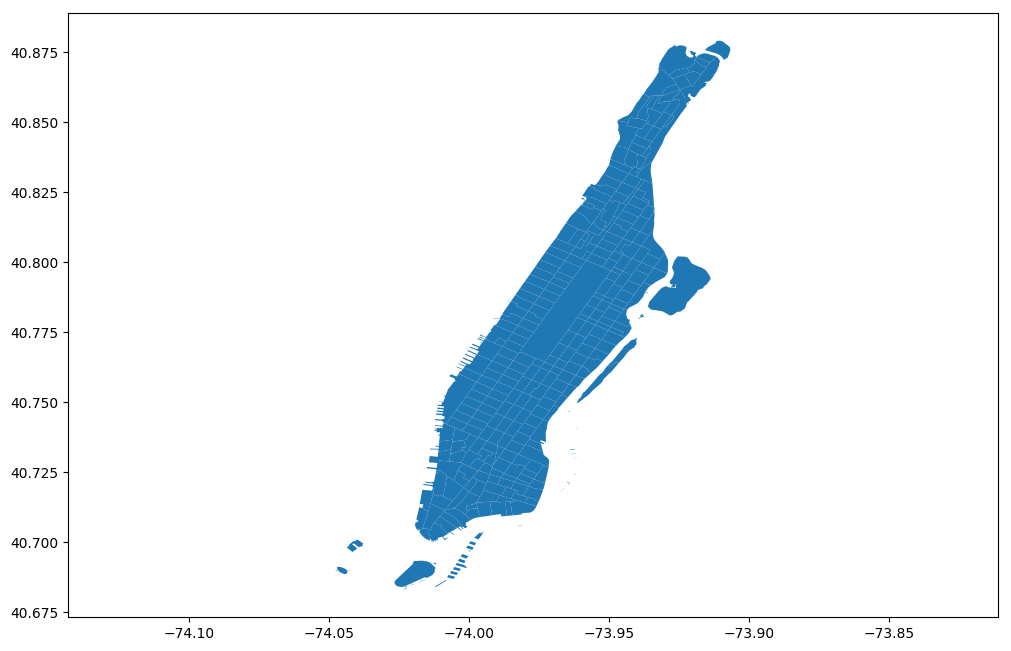

In [8]:
f, ax = plt.subplots()

ax = man.plot(ax=ax)
ax.axes.set_aspect('equal','datalim') #auto or equal

In [9]:
ct.crs

{'init': 'epsg:4326'}

In [10]:
man.crs

{'init': 'epsg:4326'}

In [11]:
ax.axes.set_aspect?

Signature: ax.axes.set_aspect(aspect, adjustable=None, anchor=None)
Docstring:
*aspect*

  ========   ================================================
  value      description
  ========   ================================================
  'auto'     automatic; fill position rectangle with data
  'equal'    same scaling from data to plot units for x and y
   num       a circle will be stretched such that the height
             is num times the width. aspect=1 is the same as
             aspect='equal'.
  ========   ================================================

*adjustable*

  ============   =====================================
  value          description
  ============   =====================================
  'box'          change physical size of axes
  'datalim'      change xlim or ylim
  'box-forced'   same as 'box', but axes can be shared
  ============   =====================================

'box' does not allow axes sharing, as this can cause
unintended side effect. For 

In [12]:
man.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099091...
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,POLYGON ((-73.96802436915851 40.75957814005282...
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...
5,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,"POLYGON ((-73.98411754823195 40.7548420534646,..."


In [13]:
len(man)

288

In [14]:
len(ct)

2166

In [15]:
# Spatial joins operate on objects with eastings and northings
man_ft = man.to_crs(epsg = 2263)
man_ft.crs

{'init': 'epsg:2263', 'no_defs': True}

In [20]:
# downloading a zipped file
#!curl -O https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip 
# unpacking into $PUIDATA
#!unzip 201501-citibike-tripdata.zip -d $PUIDATA
!ls $PUIDATA

2010_Census_Tracts_NYC_shapefile
201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
201506-citibike-tripdata.csv
201506-citibike-tripdata.zip
201705-citibike-tripdata.csv.zip
201803_citibike_tripdata.csv.zip
311_Service_Requests_from_2010_to_Present_head.csv
311_Service_Requests_from_2010_to_Present_short.csv
ACS_16_1YR_GCT2801
dhsdaily.csv
DOB_Complaints_311.csv
JC-201705-citibike-tripdata.csv
JC-201803-citibike-tripdata.csv
linkNYClocations.csv
NYPD_7_Major_Felony_Incidents.csv
PLUTO_for_WEB
PUMA_NYC_shapefile
times.txt


In [22]:
cb201501 = pd.read_csv(puidata + '/201501-citibike-tripdata.zip')
cb201501.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [23]:
# subsetting the data taking one row every 1000 rows
DEVELOPING = True
if DEVELOPING:
    cb2015 = cb201501[::1000]
else:
    cb2015 = pd.concat([cb201501, cb201506])

In [24]:
cb2015.shape

(286, 15)

In [25]:
cb201501.shape

(285552, 15)

In [27]:
#creating a date column by converting the starttime column using pd.to_datetime
cb2015['date'] = pd.to_datetime(cb2015['starttime'], errors='coerce', infer_datetime_format=True)
cb2015.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1,2015-01-01 10:46:00
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1,2015-01-01 13:39:00
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1,2015-01-01 15:48:00
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1,2015-01-01 17:51:00


In [29]:
cb2015['hour'] = cb2015.date.dt.hour
cb2015.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1,2015-01-01 10:46:00,10
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1,2015-01-01 13:39:00,13
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1,2015-01-01 15:48:00,15
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1,2015-01-01 17:51:00,17


In [34]:
(cb2015['hour'] > 18) | (cb2015['hour'] <8)

0          True
1000      False
2000      False
3000      False
4000      False
5000       True
6000       True
7000      False
8000      False
9000      False
10000     False
11000     False
12000     False
13000     False
14000     False
15000      True
16000      True
17000      True
18000     False
19000     False
20000     False
21000      True
22000     False
23000     False
24000     False
25000     False
26000     False
27000     False
28000      True
29000      True
          ...  
256000    False
257000     True
258000    False
259000    False
260000    False
261000    False
262000     True
263000     True
264000    False
265000    False
266000    False
267000    False
268000    False
269000    False
270000     True
271000     True
272000     True
273000    False
274000    False
275000    False
276000    False
277000    False
278000    False
279000    False
280000     True
281000    False
282000    False
283000    False
284000    False
285000     True
Name: hour, dtype: bool

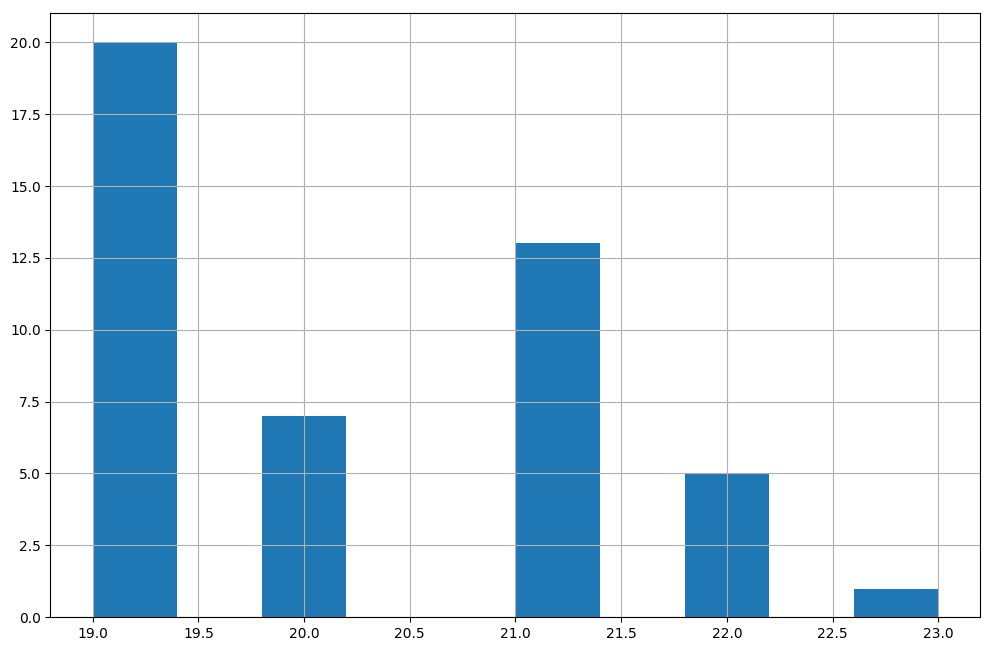

In [40]:
cb2015['hour'][(cb2015['hour'] > 18)].hist()

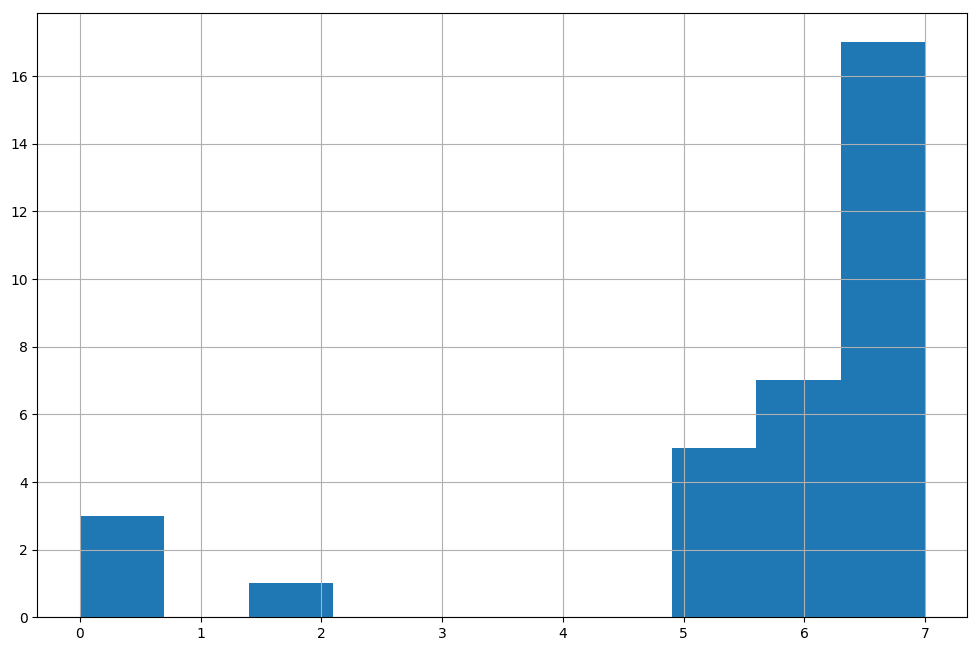

In [41]:
cb2015['hour'][cb2015['hour'] < 8].hist()

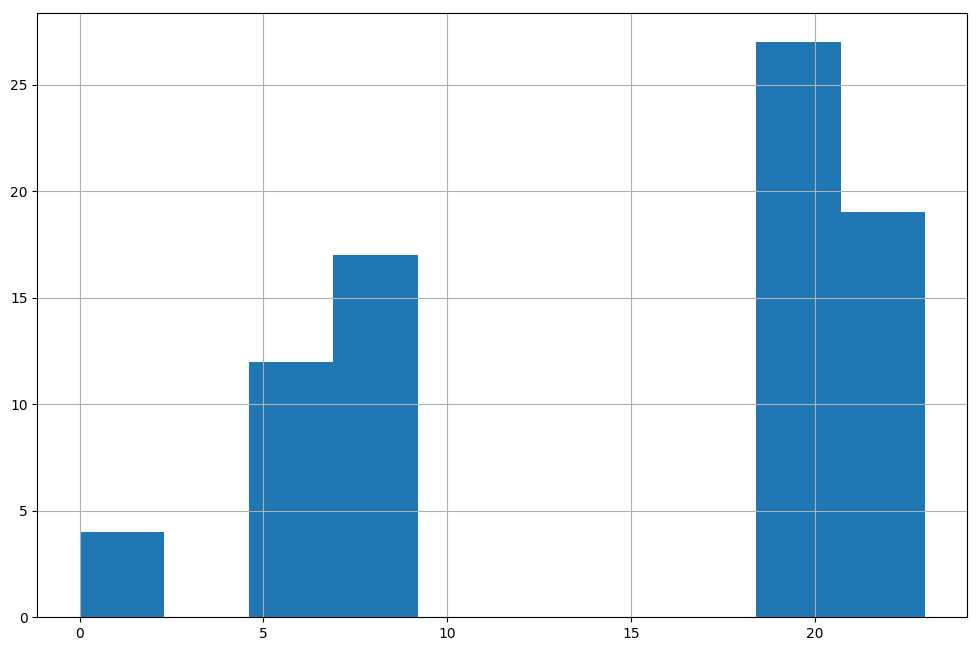

In [47]:
cb2015['hour'][(cb2015['hour'] > 18)|(cb2015['hour'] <8)].hist()

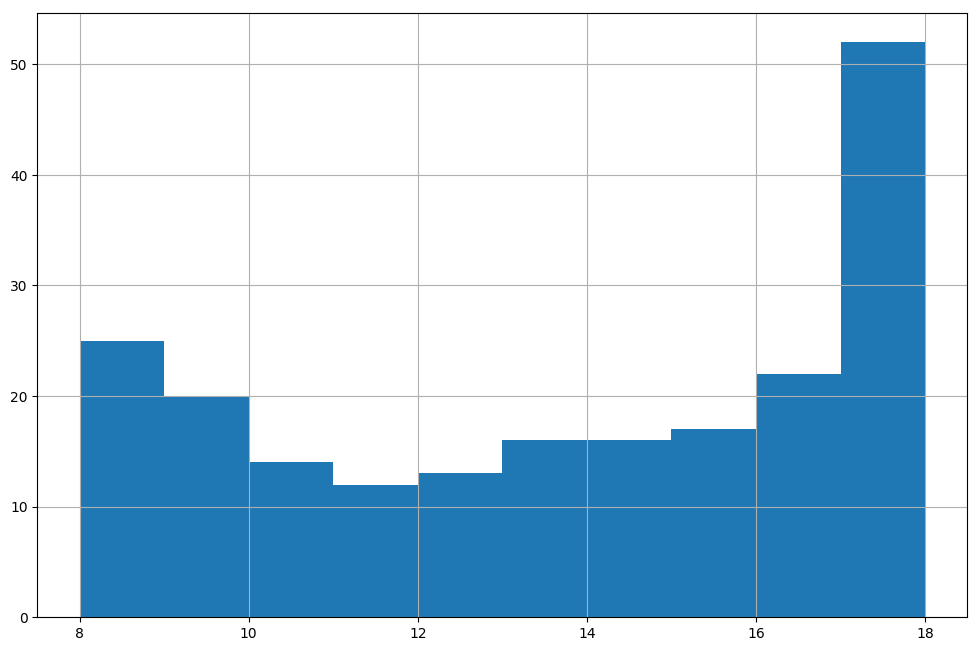

In [48]:
cb2015['hour'][~((cb2015['hour'] > 18)|(cb2015['hour'] <8))].hist()

In [52]:
night = ((cb2015['hour'] > 18)|(cb2015['hour'] <8))

In [53]:
cb2015.shape

(286, 17)

In [54]:
cb2015[night].shape

(79, 17)

In [55]:
cb2015[~night].shape

(207, 17)

In [56]:
cb2015.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'hour'],
      dtype='object')

In [58]:
cb2015[['start station latitude',
       'start station longitude']].head()

,start station latitude,start station longitude
0,40.750020,-73.969053
1000,40.743954,-73.991449
2000,40.722055,-73.989111
3000,40.732233,-73.988900
4000,40.734232,-73.986923


In [59]:
cb2015['lonlat'] = list(zip(cb2015['start station latitude'].values,
                            cb2015['start station longitude'].values))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [63]:
cb2015['geometry'] = cb2015[['lonlat']].applymap(lambda x: shapely.geometry.Point(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
cb2015 = gpd.GeoDataFrame(cb2015)

In [67]:
cb2015.crs = from_epsg(4326)

In [68]:
cb2015.crs

{'init': 'epsg:4326', 'no_defs': True}

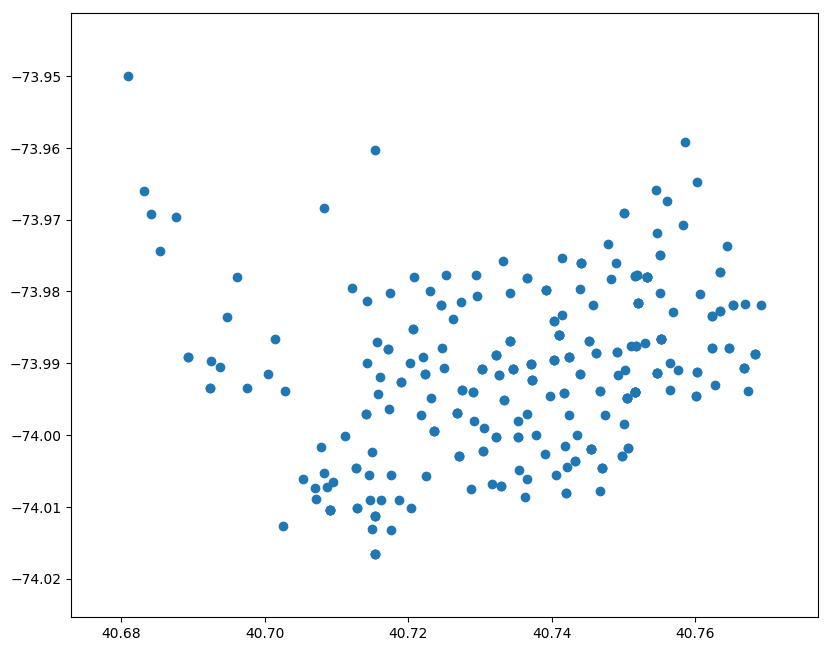

In [69]:
cb2015.plot()

In [70]:
cb2015.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,lonlat,geometry
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,0,"(40.75001986, -73.96905301)",POINT (40.75001986 -73.96905301)
1000,581,1/1/2015 10:46,1/1/2015 10:56,466,W 25 St & 6 Ave,40.743954,-73.991449,375,Mercer St & Bleecker St,40.726795,-73.996951,15552,Subscriber,1984.0,1,2015-01-01 10:46:00,10,"(40.74395411, -73.99144871)",POINT (40.74395411 -73.99144871)
2000,727,1/1/2015 13:39,1/1/2015 13:51,312,Allen St & E Houston St,40.722055,-73.989111,428,E 3 St & 1 Ave,40.724677,-73.987834,20781,Subscriber,1964.0,1,2015-01-01 13:39:00,13,"(40.722055, -73.989111)",POINT (40.722055 -73.98911099999999)
3000,490,1/1/2015 15:48,1/1/2015 15:56,483,E 12 St & 3 Ave,40.732233,-73.988900,482,W 15 St & 7 Ave,40.739355,-73.999318,17606,Subscriber,1990.0,1,2015-01-01 15:48:00,15,"(40.73223272, -73.98889957)",POINT (40.73223272 -73.98889957)
4000,182,1/1/2015 17:51,1/1/2015 17:54,297,E 15 St & 3 Ave,40.734232,-73.986923,2003,1 Ave & E 18 St,40.734161,-73.980243,18978,Subscriber,1967.0,1,2015-01-01 17:51:00,17,"(40.734232, -73.986923)",POINT (40.734232 -73.986923)


In [88]:
#use me
(cb2015[night]['tripduration'] > 1000).sum()

15

In [87]:
len(cb2015[night]['tripduration'] > 1000)

79

In [98]:
(cb2015[night][cb2015['tripduration']>1000]).count()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


tripduration               15
starttime                  15
stoptime                   15
start station id           15
start station name         15
start station latitude     15
start station longitude    15
end station id             15
end station name           15
end station latitude       15
end station longitude      15
bikeid                     15
usertype                   15
birth year                 14
gender                     15
date                       15
hour                       15
lonlat                     15
geometry                   15
dtype: int64

In [99]:
(cb2015[night][cb2015['tripduration']>1000]).sum()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/geodataframe.py:398: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


tripduration                19783.000000
start station id             5962.000000
start station latitude        611.082881
start station longitude     -1109.846852
end station id               6644.000000
end station latitude          610.959822
end station longitude       -1109.841034
bikeid                     286401.000000
birth year                  27645.000000
gender                         18.000000
hour                          199.000000
dtype: float64

In [100]:
(cb2015[night]['tripduration'] <= 1000).sum()

64

In [104]:
[(cb2015[night]['tripduration'] > 1000).sum(), (cb2015[night]['tripduration'] <= 1000).sum()]

[15, 64]

**null hypothesis that the number of trips is uniformly distributed across the time interval (night)**


In [105]:
#The chi square test tests the null hypothesis that the categorical data has the given frequencies.

#it tests whether the distribution of sample categorical data matches an expected distribution.

sp.stats.chisquare([(cb2015[night].tripduration > 1000).sum(),
                    (cb2015[night].tripduration <= 1000).sum()])

Power_divergenceResult(statistic=30.39240506329114, pvalue=3.5290718649380182e-08)

**null hypothesis that the number of trips is uniformly distributed across the time interval (day)**


In [106]:
#t est if the split between trips longer than 1000 seconds 
# and shorter than 1000 seconds is the same during the day and during the night
sp.stats.chisquare([(cb2015[night].tripduration > 1000).sum(), 
                    (cb2015[night].tripduration <= 1000).sum()],
                   [(cb2015[~night].tripduration > 1000).sum(), 
                    (cb2015[~night].tripduration <= 1000).sum()])

Power_divergenceResult(statistic=79.181385281385289, pvalue=5.6661441331254484e-19)

KstestResult(statistic=0.11020529110633848, pvalue=0.0017624145717405337)

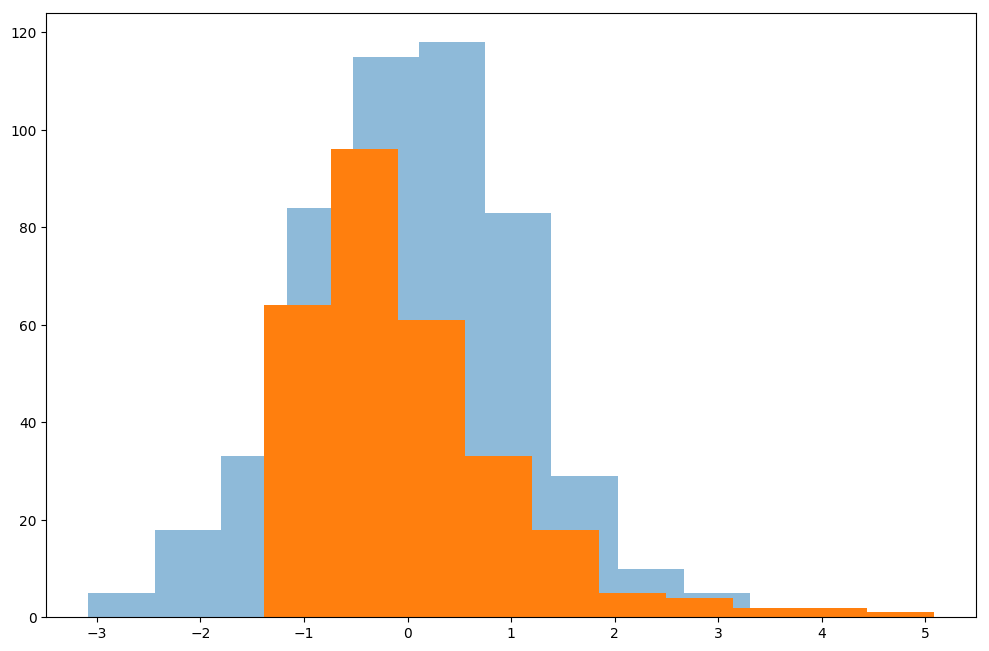

In [110]:
plt.hist(np.random.randn(500), alpha=0.5)

plt.hist((cb2015.tripduration.values - cb2015.tripduration.values.mean()) \
        / cb2015.tripduration.values.std())
sp.stats.kstest((cb2015.tripduration.values - cb2015.tripduration.values.mean()) 
                / cb2015.tripduration.values.std(), "norm")

In [111]:
#tests that only compare shapes, regardless of the mean, include tests for correlation
#I have to remove the nans before running a Pearson's r test
cb2015.dropna(inplace=True)
stats.pearsonr(cb2015.tripduration.values, cb2015['birth year'].values)


(-0.076104621648486484, 0.20503752589008437)